In [72]:
from decimal import Decimal
import random
import struct
import copy
import matplotlib.pyplot as plt

Algoritmo Genético

In [3]:
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self):
        self.l = 0
        self.queue = []      
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        
        self.queue.append(item)
        self.l += 1
        j = self.l - 2
        while (j >= 0) and (item[1] < self.queue[j][1]):
            self.queue[j+1] = self.queue[j]
            j -= 1
        self.queue[j+1] = item    
        
    def dequeue(self):
        """
        Remove item with lowest key
        """
        x = self.queue[self.l-1]
        self.l -= 1
        return x[1]

Optimizar:

$f(x,y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$

En el intrevalo: $ -4.5 \leq x,y \leq 4.5$

Población: 100

Elitismo: 10 mejores se usan para crossover de forma aleatoria.

Encontrar mínimos de la función 

Lo que tengo como fitness es evaluar $f(x,y)_{min}$

Probabilidad de mutación: p = 0.1

Epochs = 100

Guardar mejor solución de cada época.

Algoritmo

In [62]:
def evaluation(x,y):
    x = Decimal(x)
    y = Decimal(y)
    
    z = (Decimal(1.5) - x + x*y)**2 + (Decimal(2.25) - x + x*y*y)**2 + (Decimal(2.625) - x + x*y*y*y)**2
    z = float(z)
    return z

In [40]:
def float_to_bit_array(f):
    packed_data = struct.pack('d', f)
    
    bit_array = []
    for byte in packed_data:
        bits = bin(byte)[2:].rjust(8, '0') 
        bit_array.extend(map(int, bits))
    
    return bit_array


In [41]:
def bit_array_to_float(bit_array):
    bytes_data = bytes([int(''.join(map(str, bit_array[i:i+8])), 2) for i in range(0, len(bit_array), 8)])

    float_value = struct.unpack('d', bytes_data)[0]
    return float_value

In [42]:
def individuo_init():
    xy = []
    x = random.uniform(-4.5,4.5)
    y = random.uniform(-4.5,4.5)

    z = evaluation(x,y)

    xy.append(x)
    xy.append(y)
    
    return xy

In [43]:
def population(N):
    people = []
    for i in range(N):
        indiv = individuo_init()
        people.append(indiv)
    return people

In [44]:
def fitness(people):
    people_sorted = PriorityQueue()
    for i in range(len(people)):
        indiv = people[i]
        people_sorted.enqueue([indiv,evaluation(indiv[0],indiv[1])])
    return people_sorted

In [45]:
def best_10(fitted_people):
    return fitted_people.queue[0:10]

In [46]:
def bit_indiv(best_10_people):
    bits = []
    for i in best_10_people:
        x = float_to_bit_array(i[0][0])
        y = float_to_bit_array(i[0][1])
        bits.append (x + y)
    return bits 

In [47]:
def crossover(bits_10_people):
    temp = copy.deepcopy(bits_10_people)
    next_generation = []
    while len(temp):
        #print(len(temp))
        p1 = round(random.uniform(0,len(temp)-1))
        p1 = temp.pop(p1)
        #print(len(temp))

        p2 = round(random.uniform(0,len(temp)-1))
        p2 = temp.pop(p2)
        #print(len(temp))

        pivot = round(random.uniform(0,127))
        #print("P1: " + str(p1))
        #print("P2: " + str(p2))
        #print("Pivot: " + str(pivot))
        child1 = p1[0:pivot] + p2[pivot:]
        child2 = p2[0:pivot] + p1[pivot:]

        next_generation.append(child1)
        next_generation.append(child2)

        if len(next_generation) < 100 and len(temp) == 0:
            temp = copy.deepcopy(bits_10_people)
        #print("Ch1: " + str(child1))
        #print("Ch2: " + str(child2))
    return next_generation

In [48]:
def mutation(next_generation):
    for i in next_generation:
        probability = round(random.uniform(0,100))
        mutate = False
        if probability <= 10:
            mutate = True
        
        if mutate:
            index = round(random.uniform(0,127))
            if i[index] == 0:
                i[index] = 1
            else:
                i[index] = 0
    return next_generation

In [69]:
def genetic_algorithm_minimization(epoch):
    initial_population = population(100)
    best_of_epoch = [] 
    for i in range(epoch):
        fitted_people = fitness(initial_population)  
        best_of_epoch.append(fitted_people.queue[0])
        best_10_people = best_10(fitted_people) 
        bits_10_people = bit_indiv(best_10_people)
        childs = crossover(bits_10_people)
        mutated_generation = mutation(childs)
        next_generation = []
        for i in mutated_generation:
            x = i[0:64]
            x = bit_array_to_float(x)
            y = i[64:]
            y = bit_array_to_float(y)
            next_generation.append([x,y])
        initial_population = next_generation
    fitted_people = fitness(initial_population)  
    best_of_epoch.append(fitted_people.queue[0])
    return best_of_epoch

In [83]:
epoch = 100

convergence = genetic_algorithm_minimization(epoch)
x = []
y = []
min_value = []
for i in convergence: x.append(i[0][0]),y.append(i[0][1]),min_value.append(i[1])

Final value of X: 2.843749999999996


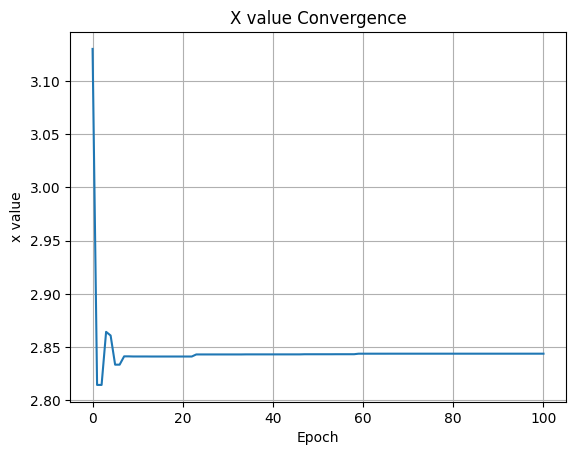

In [97]:
plt.plot(x)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('x value')
plt.title('X value Convergence')
print("Final value of X: " + str(x[100]))

Final value of Y: 0.45312499999636197


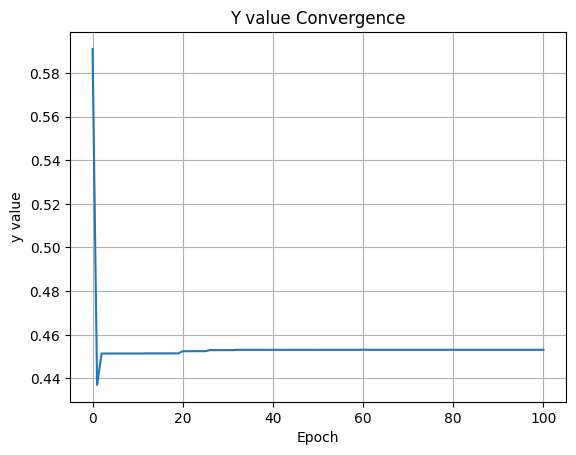

In [98]:
plt.plot(y)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('y value')
plt.title('Y value Convergence')
print("Final value of Y: " + str(y[100]))


Final value of f(x,y): 0.0052414265715762425


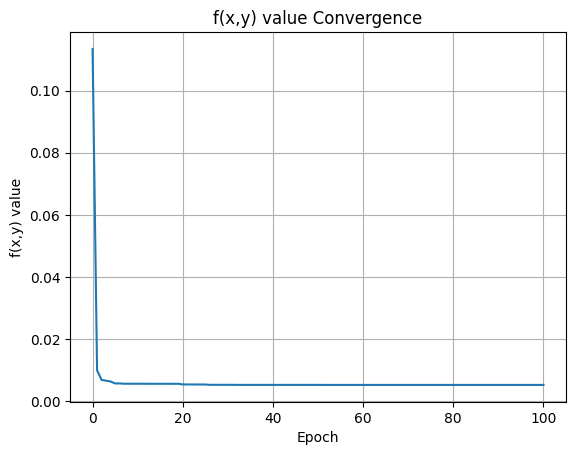

In [99]:
plt.plot(min_value)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('f(x,y) value')
plt.title('f(x,y) value Convergence')
print("Final value of f(x,y): " + str(min_value[100]))


### Conclusión

En conclusión, se puede observar que la convergencia de los valores x,y utilizando el algoritmo genético planteado es sumamente rápida. En tan solo 10 iteraciones aproximadamente, se logró converger a un valor sumamente estable. Este algoritmo tiene muchos usos para diversas aplicaciones ya que se puede encontrar valores deseados de forma rápida y efectiva, a problemas de difícil resolución como lo es el minimizar la función propuesta.